In [ ]:
pip install finterstellar

In [9]:
import finterstellar as fs

In [10]:
data = fs.fn_consolidated(otp='OTP', term='2020Q4')
data['avg_volume']

2020Q4...OK


symbol
A        1307200
AA       3443600
AAIC      202700
AAL     57891100
AAN       541700
          ...   
ZUMZ      149500
ZUO      1354700
ZVO       364600
ZYME      218900
ZYXI      289300
Name: avg_volume, Length: 3133, dtype: int64

In [11]:
data = fs.fn_consolidated(otp='OTP', term='2020Q4', vol=0)
data['avg_volume']

2020Q4...OK


symbol
A        1307200
AA       3443600
AAIC      202700
AAL     57891100
AAME        7800
          ...   
ZUMZ      149500
ZUO      1354700
ZVO       364600
ZYME      218900
ZYXI      289300
Name: avg_volume, Length: 4169, dtype: int64

In [12]:
data = fs.fn_consolidated(otp='OTP', term='2020Q4', vol=1000000)
data['avg_volume']

2020Q4...OK


symbol
A        1307200
AA       3443600
AAL     57891100
AAPL    99116600
ABBV     6148100
          ...   
ZNGA    12415400
ZS       1469600
ZTO      1883100
ZTS      1292600
ZUO      1354700
Name: avg_volume, Length: 996, dtype: int64

In [13]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
for t in terms:
    # Set previous terms
    prev_t = fs.quarters_before(terms, t, 4)
    # Company size
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    # Value
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    # Profitability
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'ROA'] = float('nan')
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']   
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan') 
    data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity']
    # Stability
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Debt/Equity'] = float('nan')
    data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities']
    data[t]['Share Increase'] =  data[t]['Shares'] / data[prev_t]['Shares'] 
    # Efficiency
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
    data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']
    data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity']
    # Momentum
    data[t]['Price Growth'] =  data[t]['Price_M3'] / data[prev_t]['Price_M3'] 

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [14]:
data['2010Q4']

,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,GP/A,GP/E,Liability/Equity,Debt/Equity,Current Ratio,Share Increase,Gross Margin,Asset Turnover,Equity Turnover,Price Growth
symbol,,,,,,,,,,,,,,,,,,,,,
A,2010Q4,"5,444.00","2,514.00","2,930.00","1,752.00",566.00,684.00,1.97,768.00,566.00,...,0.30,0.91,2.00,1.14,2.00,1.00,0.54,0.56,1.68,1.00
AAL,2010Q4,"22,170.00","18,040.00","4,130.00",0.00,308.00,-471.00,-1.41,308.00,308.00,...,0.16,-1.05,nan,nan,0.78,1.00,0.19,0.88,-5.62,1.00
AAP,2010Q4,"5,925.20","2,963.89","2,961.32","2,376.38",584.93,344.50,4.00,749.37,584.93,...,0.88,2.85,2.23,0.29,1.15,1.00,0.50,1.77,5.70,1.00
AAPL,2010Q4,"76,283.00","46,712.00","29,571.00","6,125.00","21,487.00","16,639.00",0.65,"22,661.00","21,487.00",...,0.34,0.54,0.59,0.00,1.85,1.00,0.39,0.88,1.40,1.00
AAU,2010Q4,0.23,0.00,0.23,4.12,-3.89,-3.39,-0.07,-3.71,-3.89,...,0.01,0.01,0.02,0.00,45.98,1.00,1.00,0.01,0.01,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBH,2010Q4,"4,220.20","1,012.20","3,208.00","1,759.10",916.70,596.90,2.98,"1,460.90",916.70,...,0.40,0.56,0.39,0.20,4.28,1.00,0.76,0.53,0.73,1.00
ZBRA,2010Q4,894.36,473.58,420.77,185.59,148.22,101.78,1.78,179.42,148.22,...,0.48,0.58,0.20,0.00,4.34,1.00,0.47,1.02,1.23,1.00
ZION,2010Q4,"2,760.31",592.46,"2,167.85","2,545.50",-403.17,-412.50,-2.48,nan,nan,...,0.04,0.33,6.68,0.43,0.98,1.00,0.79,0.05,0.42,1.00


In [15]:
# GP/E + 소형주 + 증자X + 중유동주
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)    
    s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s3[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=30)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 17.61%
Accumulated return: 407.12%
Investment period: 10.0yrs
Sharpe ratio: 1.37
MDD: -50.85%


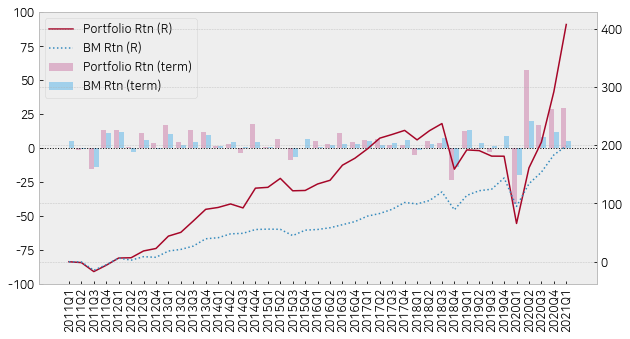

In [16]:
fs.draw_return(df)

In [21]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t, vol=1000000)
for t in terms:
    # Set previous terms
    prev_t = fs.quarters_before(terms, t, 4)
    # Company size
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    # Value
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    # Profitability
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'ROA'] = float('nan')
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']   
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan') 
    data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity']
    # Stability
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Debt/Equity'] = float('nan')
    data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities']
    data[t]['Share Increase'] =  data[t]['Shares'] / data[prev_t]['Shares'] 
    # Efficiency
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
    data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']
    data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity']
    # Momentum
    data[t]['Price Growth'] =  data[t]['Price_M3'] / data[prev_t]['Price_M3'] 

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [22]:
# GP/E + 소형주 + 증자X + 고유동주
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)    
    s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s3[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=30)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 12.24%
Accumulated return: 217.69%
Investment period: 10.0yrs
Sharpe ratio: 1.23
MDD: -23.73%
